In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('parks.csv')
df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
Park Code    56 non-null object
Park Name    56 non-null object
State        56 non-null object
Acres        56 non-null int64
Latitude     56 non-null float64
Longitude    56 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ KB


In [18]:
df_states = pd.read_csv('us_states.csv')
df_states.head()

,ALABAMA,Alabama,AL
0,ALASKA,Alaska,AK
1,ARIZONA,Arizona,AZ
2,ARKANSAS,Arkansas,AR
3,CALIFORNIA,California,CA
4,COLORADO,Colorado,CO


In [27]:
# counting number of parks per state and the park area
num_parks = df.groupby(['State','Park Name','Acres']).size()
df1 = num_parks.to_frame(name ='size').reset_index()
df1

,State,Park Name,Acres,size
0,AK,Denali National Park and Preserve,3372402,1
1,AK,Gates Of The Arctic National Park and Preserve,7523898,1
2,AK,Glacier Bay National Park and Preserve,3224840,1
3,AK,Katmai National Park and Preserve,3674530,1
4,AK,Kenai Fjords National Park,669983,1
5,AK,Kobuk Valley National Park,1750717,1
6,AK,Lake Clark National Park and Preserve,2619733,1
7,AK,Wrangell - St Elias National Park and Preserve,8323148,1
8,AR,Hot Springs National Park,5550,1
9,AZ,Grand Canyon National Park,1217403,1


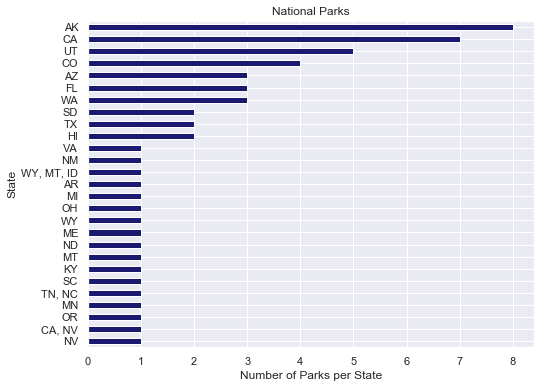

In [52]:
# plot Number of National Parks per State
fig = plt.figure(figsize=(8,6))
df1['State'].value_counts().sort_values().plot.barh(color='midnightblue')
plt.title('National Parks')
plt.xlabel('Number of Parks per State')
plt.ylabel('State')
plt.show()

In [8]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [16]:
import plotly.graph_objects as go
for col in df.columns:
    df[col] = df[col].astype(str)
df['text'] = df['Park Name']
fig = go.Figure(data=go.Choropleth(
    locations=df['State'],
    z=df['Acres'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'],
    marker_line_color='white', # line markers between states
    colorbar_title="Acres"
))
fig.update_layout(
    title_text='US National Parks',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)


fig.show()


In [10]:
df2 = pd.read_csv('species.csv')
df2.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 14 columns):
Species ID             119248 non-null object
Park Name              119248 non-null object
Category               119248 non-null object
Order                  117776 non-null object
Family                 117736 non-null object
Scientific Name        119248 non-null object
Common Names           119248 non-null object
Record Status          119248 non-null object
Occurrence             99106 non-null object
Nativeness             94203 non-null object
Abundance              76306 non-null object
Seasonality            20157 non-null object
Conservation Status    4718 non-null object
Unnamed: 13            5 non-null object
dtypes: object(14)
memory usage: 12.7+ MB


In [12]:
df2.isnull().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names                0
Record Status               0
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
Unnamed: 13            119243
dtype: int64

In [13]:
df2 = df2.iloc[:,:-1]
df2.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN


In [14]:
df_cons_spe = pd.crosstab(df2['Category'], df2['Conservation Status'], margins=True)
df_cons_spe

Conservation Status,Breeder,Endangered,Extinct,In Recovery,Migratory,Proposed Endangered,Proposed Threatened,Resident,Species of Concern,Threatened,Under Review,All
Category,,,,,,,,,,,,
Amphibian,0,5,0,0,0,0,0,0,61,8,26,100
Bird,4,64,0,65,0,2,0,4,2371,51,70,2631
Crab/Lobster/Shrimp,0,1,0,0,0,0,0,0,0,0,1,2
Fish,1,33,1,0,0,0,0,0,66,40,10,151
Fungi,0,1,0,0,0,0,0,0,2,0,1,4
Insect,0,17,0,0,0,1,0,0,107,4,12,141
Invertebrate,0,9,0,0,0,0,0,0,1,7,4,21
Mammal,1,93,0,9,2,0,3,0,552,19,1,680
Nonvascular Plant,0,0,0,0,0,0,0,0,27,0,4,31


In [15]:
df_cons_spe['Endangered'].value_counts()

1      3
17     2
5      2
33     1
93     1
9      1
374    1
128    1
0      1
64     1
Name: Endangered, dtype: int64